# Business understanding


### Problem statement
The objective of this project is to build a predictive model that will help identify customers that are likely to stop using SyriaTel company. We will try to answer the questions; are there any predictable patterns of the customers who are stopping the use of SyriaTel services? What are the features that might be significant in the customers who churn?

### Business context
SyriaTel is one of the top mobile network providers in Syria.The company offers services including calls, news, message, GSM and internet services. The induestry currently experiences stiff competition and therefore retaining customers is crucial for sustaining company's revenue growth. Doing customer churn analysis will help us identify features that are contributing to customer churn. This will enable the implementation of measures that will help reduce the customers stoppage from using company's services.

### Objectives
Includes: 
1. To develop a machine learning model that can accurately predict customer churn based on historical customer data and behavioral patterns
2. To identify key features that significantly contribute to customer churn.This will enable for drawing of  insights into the underlying causes.
3. To Achieve a high level of accuracy and recall in the churn prediction model to minimize both false negatives (customers who churn but were not predicted) and false positives (customers predicted to churn but do not).
4. To Utilize the prediction model to come up with mitigation measures to help curb the customer churn problem.
5. To come up with recommendations to the company on how to retain their customers as this will help maintain the company's market share.

## Data understanding

In [1380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [1381]:
df = pd.read_csv('bigml_59c28831336c6604c800002a (1).csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Check for shape

In [1382]:
df.shape

(3333, 21)

### Check for datatypes

In [1383]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Some features like phone nummber and account length have less impact on customers churn. We will then term them as irrelevant.

In [1384]:
df = df.drop(['phone number', 'account length'], axis=1)
df

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [1385]:
numerical_columns = ['number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls',
                'total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls',
                'total intl charge','customer service calls']
categorical_columns = ['state','international plan','voice mail plan','area code']

### Check for missing values

In [1386]:
df.isna().sum()

state                     0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Look at descriptive statistics

In [1387]:
df.describe()

,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Check for duplicates

In [1388]:
df.duplicated().sum()

0

There are no duplicated values.

### Exploratory data analysis 

Unique values in the dataset

In [1389]:
df.nunique()

state                       51
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [1390]:
df['churn'] = df['churn'].map({False : 0, True : 1}).astype('int')
df

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


We can see that there are four categorical features, lets analyze them. State has a lot of values which makes it hard to visualize.

415    1655
510     840
408     838
Name: area code, dtype: int64


<AxesSubplot:xlabel='area code', ylabel='count'>

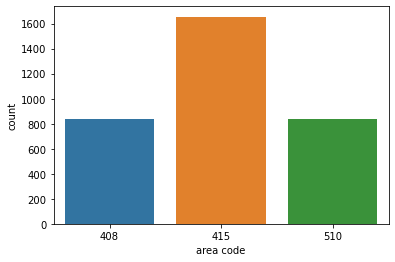

In [1391]:
print(df['area code'].value_counts())
sns.countplot(data = df, x='area code')

From the above result, we can see that there are 1655 customers from area code 415. There are around a quarter of the total customers from area codes 510 and 408.

What is the relationship between area codes and customer churn in relation to the number of calls that are made to the customer service.

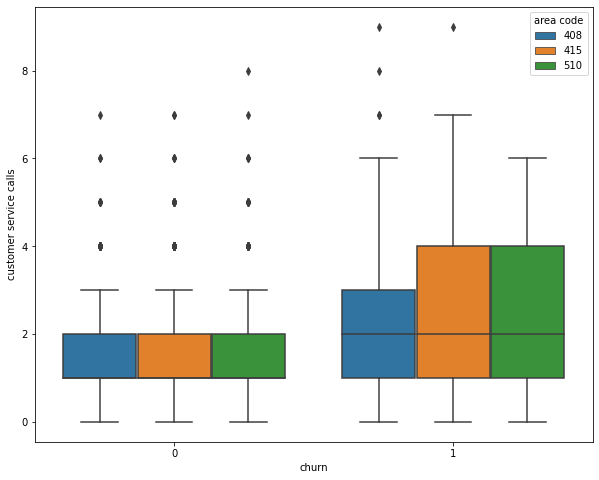

In [1392]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='churn',y='customer service calls',hue='area code');

From the above, we can see that there are outlieres in customers who churned from all the area codes. We also see that a lot of customers from area codes, 415 and 510 churned. We therefore need to look more into customers from these two codes, 415 and 510 and understand more about the features that they have in common.

Next, let us do analysis on international plan

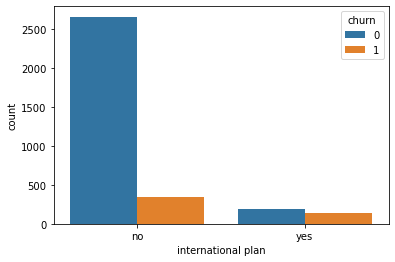

In [1393]:
df['international plan'].value_counts()
sns.countplot(data=df, x='international plan', hue='churn');

From the analysis above of international plan, we can see that there is a high number of customers who are not subscribed to international plan who did not churn. Also from the few customers that are subscribed to international plan, we can see that few customers churned. So probably, having international plan by the customers does not contribute much to customers stopping the usage of SyriaTel services.

In [1394]:
df['voice mail plan'].value_counts()


no     2411
yes     922
Name: voice mail plan, dtype: int64

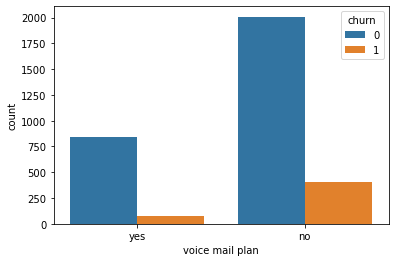

In [1395]:
sns.countplot(data = df, x='voice mail plan', hue='churn');

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
Name: state, dtype: int64


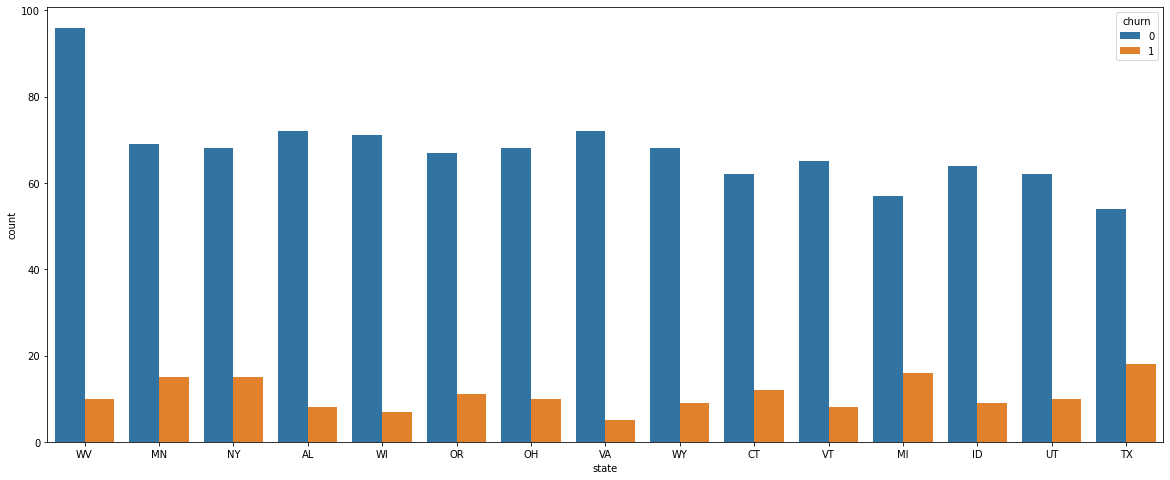

In [1396]:
print(df['state'].value_counts().head(15))
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='state', hue='churn',order= df['state'].value_counts().iloc[0:15].index);

From the above we can see that the states that have the highest number of customers were WV,MN, NY, AL and WI. 
We've also seen that the states having the large number of cutomers that churned were WV, AL and VA, WI,WY,OH. 
Since the above sequence of customer churn per state did  not rely on the sequence of number of customers in the states, we can say that there might be some other factors besides states that might lead to customer churning.

From the above analysis, the majority of the customers are not subscribed to voice mail plan, 2411.
Secondly, it is clear that most customers who are either subscribed to the voice mail plan did not churn. This gives us a rough idea that there is a high probability that whether or not the customer has voice mail plan does not affect the churning.
We also see that from the customers who churned, majority are from those who did not have a voice mail plan, this is probably due to the high number of cutomers who did not have voice mail plan.

Look at the target variable and visualize

In [1397]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

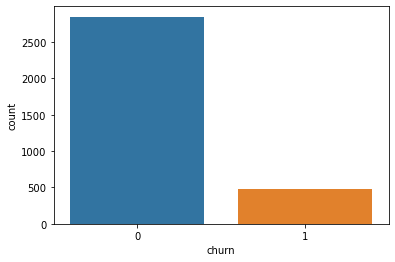

In [1398]:
sns.countplot(data = df, x='churn');

We can see from above that the target variable has a class imbalance problem. This has to be dealt wth to avoid rendering our model poor.

Let's change the values of churn column to numeric values. False will take 0 and true will take 1.

In [1399]:
df.dtypes

state                      object
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
dtype: object

### Next, look at the correlation between features

In [1400]:
correlation_matrix = df.corr()

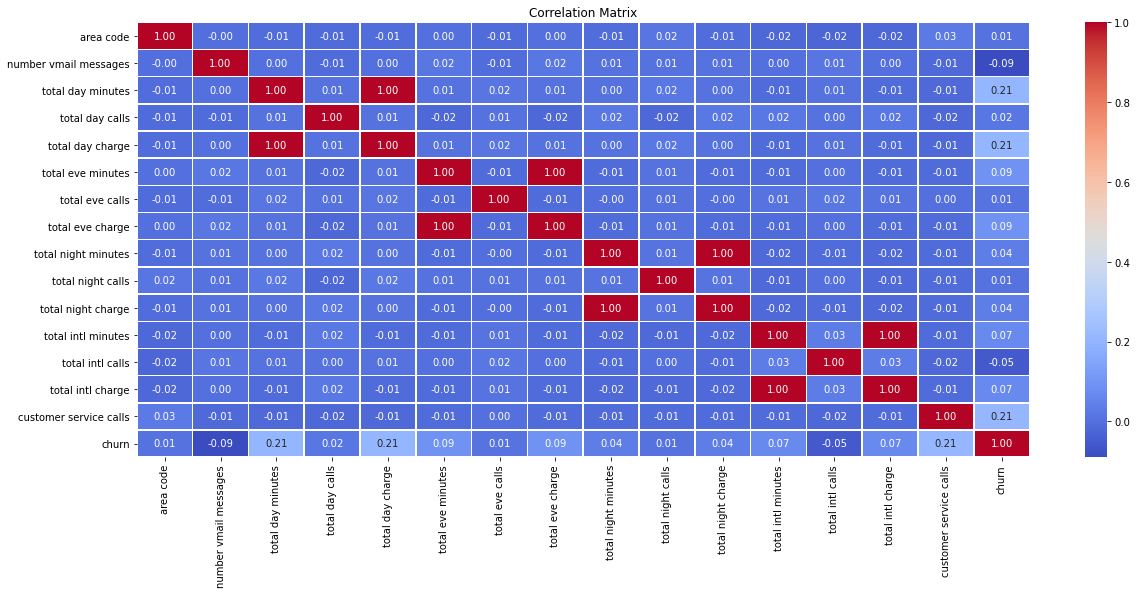

In [1401]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that there are some features that are perfectly correlated like; 
1. total today charge and total today minutes 
2. total eve charge and total eve minutes 
3. total night charge and total night minutes 
4. total intl minutes and total intl charge 

The perfect correlation in this perspective is expected because the number of minutes that a customer gets is directly related to the  amount that is spent when buying those minutes. You buy the minutes.

###  Outlier treatment

From the above boxplots, we can see that there are alot of outliers. We will then treat/ remove some of the outliers.

In [1402]:
cols = ['number vmail messages','total day calls','total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls',
                'total intl charge','customer service calls']

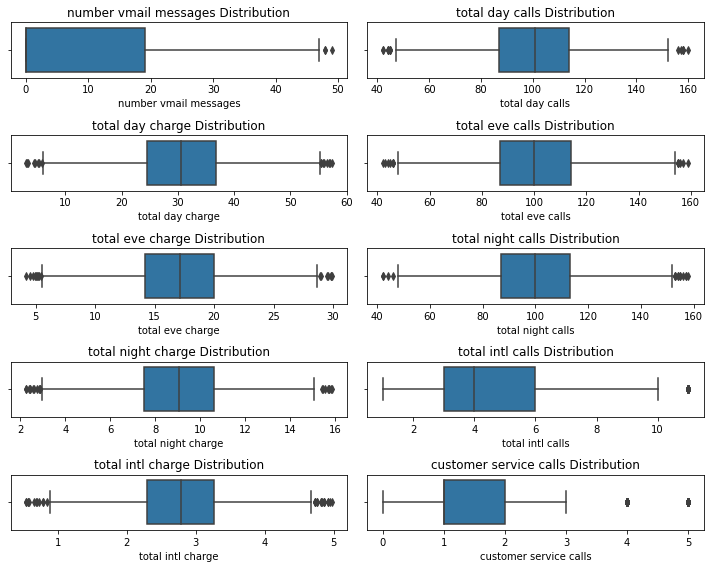

In [1403]:


def remove_outliers(df, columns, threshold=3):
    
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
        outliers = df_cleaned.loc[abs(z_scores) > threshold]  # Find outliers based on threshold
        df_cleaned = df_cleaned.drop(outliers.index)  # Remove outliers from the DataFrame
    
    return df_cleaned


# Specify the columns to remove outliers from
columns_to_remove_outliers = cols

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(len(columns_to_remove_outliers)//2 + len(columns_to_remove_outliers)%2, 2, i+1)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()


In [1404]:
df_cleaned.shape

(3176, 19)

In [1405]:
df_cleaned

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Let us remove highly correlated features; we are working on df_cleaned dataset not df

In [1406]:


def remove_highly_correlated_features(data, threshold=0.9):
    """
    Remove highly correlated features from a DataFrame based on a correlation threshold.
    
    Args:
        data (pandas.DataFrame): Input DataFrame.
        threshold (float): Correlation threshold to consider features as highly correlated.
                           Default is 0.9, which is a common choice.
    
    Returns:
        pandas.DataFrame: DataFrame with highly correlated features removed.
    """
    # Calculate the correlation matrix and take the absolute value
    corr_matrix = data.corr().abs()
    
    # Create a True/False mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    
    # List column names of highly correlated features (r > threshold)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    
    # Drop the highly correlated features from the DataFrame
    df_cleaned2 = data.drop(to_drop, axis=1)
    
    return df_cleaned2

# Specify the DataFrame with the features
data = pd.DataFrame(df_cleaned)  # Replace ... with your DataFrame

# Remove highly correlated features
df_cleaned2 = remove_highly_correlated_features(data, threshold=0.9)

# Print the cleaned DataFrame
df_cleaned2


,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,WV,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,RI,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,CT,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


### Define predictors and the target variables that is; X and Y variables

In [1407]:
y = df_cleaned2['churn']
X = df_cleaned2.drop('churn', axis=1)

### Perform a train test split on the dataset

In [1408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Transforming categorical features to dummy variables on the training data

In [1409]:
X_train

,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1957,KY,408,no,no,0,79,36.18,91,17.35,113,7.03,2,2.75,1
535,NE,408,no,no,0,101,8.23,138,23.89,87,9.83,1,4.91,1
2680,WI,510,no,yes,28,62,28.22,88,19.88,84,7.65,3,2.08,2
1227,LA,510,no,yes,33,139,31.37,78,15.57,106,5.73,6,3.32,0
2404,WA,408,no,no,0,80,35.77,96,15.01,56,6.74,4,4.19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,CT,415,no,no,0,101,46.09,133,20.18,103,6.54,6,2.27,1
959,GA,408,no,no,0,100,28.12,87,9.83,118,8.72,5,3.46,2
1163,OR,510,no,yes,30,107,33.03,108,20.67,114,14.50,5,1.92,1
245,SC,408,no,no,0,107,18.75,93,14.15,96,9.10,5,2.57,0


In [1410]:

categorical_features = ['state','international plan','voice mail plan','area code']
X_train_categorical = X_train[categorical_features].copy()
X_train_categorical

,state,international plan,voice mail plan,area code
1957,KY,no,no,408
535,NE,no,no,408
2680,WI,no,yes,510
1227,LA,no,yes,510
2404,WA,no,no,408
...,...,...,...,...
2889,CT,no,no,415
959,GA,no,no,408
1163,OR,no,yes,510
245,SC,no,no,408


In [1411]:


ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train_categorical).toarray()

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features))
encoded_df

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### Normalize the numerical features on the training data

In [1412]:
numeric_features = ['number vmail messages','total day calls','total day charge','total eve calls',
                'total eve charge','total night calls','total night charge','total intl calls',
                'total intl charge','customer service calls']
X_train_numeric = X_train[numeric_features].copy()
X_train_numeric

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
1957,0,79,36.18,91,17.35,113,7.03,2,2.75,1
535,0,101,8.23,138,23.89,87,9.83,1,4.91,1
2680,28,62,28.22,88,19.88,84,7.65,3,2.08,2
1227,33,139,31.37,78,15.57,106,5.73,6,3.32,0
2404,0,80,35.77,96,15.01,56,6.74,4,4.19,1
...,...,...,...,...,...,...,...,...,...,...
2889,0,101,46.09,133,20.18,103,6.54,6,2.27,1
959,0,100,28.12,87,9.83,118,8.72,5,3.46,2
1163,30,107,33.03,108,20.67,114,14.50,5,1.92,1
245,0,107,18.75,93,14.15,96,9.10,5,2.57,0


In [1413]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_features)
scaled_df


,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,0.000000,0.313559,0.616456,0.418803,0.512252,0.612069,0.351212,0.1,0.498871,0.2
1,0.000000,0.500000,0.097325,0.820513,0.766628,0.387931,0.556943,0.0,0.986456,0.2
2,0.571429,0.169492,0.468611,0.393162,0.610657,0.362069,0.396767,0.2,0.347630,0.4
3,0.673469,0.822034,0.527117,0.307692,0.443018,0.551724,0.255694,0.5,0.627540,0.0
4,0.000000,0.322034,0.608841,0.461538,0.421237,0.120690,0.329904,0.3,0.823928,0.2
...,...,...,...,...,...,...,...,...,...,...
2377,0.000000,0.500000,0.800520,0.777778,0.622326,0.525862,0.315209,0.5,0.390519,0.2
2378,0.000000,0.491525,0.466753,0.384615,0.219759,0.655172,0.475386,0.4,0.659142,0.4
2379,0.612245,0.550847,0.557949,0.564103,0.641385,0.620690,0.900073,0.4,0.311512,0.2
2380,0.000000,0.550847,0.292719,0.435897,0.387787,0.465517,0.503306,0.4,0.458239,0.0


Concatenate the one hot encoded categorical features with normalized numerical features

In [1414]:
X_train_full = pd.concat([scaled_df, encoded_df], axis=1)
X_train_full

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.000000,0.313559,0.616456,0.418803,0.512252,0.612069,0.351212,0.1,0.498871,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.500000,0.097325,0.820513,0.766628,0.387931,0.556943,0.0,0.986456,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.571429,0.169492,0.468611,0.393162,0.610657,0.362069,0.396767,0.2,0.347630,0.4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.673469,0.822034,0.527117,0.307692,0.443018,0.551724,0.255694,0.5,0.627540,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,0.322034,0.608841,0.461538,0.421237,0.120690,0.329904,0.3,0.823928,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,0.000000,0.500000,0.800520,0.777778,0.622326,0.525862,0.315209,0.5,0.390519,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2378,0.000000,0.491525,0.466753,0.384615,0.219759,0.655172,0.475386,0.4,0.659142,0.4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2379,0.612245,0.550847,0.557949,0.564103,0.641385,0.620690,0.900073,0.4,0.311512,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2380,0.000000,0.550847,0.292719,0.435897,0.387787,0.465517,0.503306,0.4,0.458239,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


From our earlier analysis, we had seen that there was class imbalance problem. 
Therefore, we will apply SMOTE technique to resolve this.

In [1415]:
sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_full, y_train)
# create a new dataframe consisting of the resampled features
df_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_resampled

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510,churn
0,0.000000,0.313559,0.616456,0.418803,0.512252,0.612069,0.351212,0.100000,0.498871,0.200000,...,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,0.000000,0.500000,0.097325,0.820513,0.766628,0.387931,0.556943,0.000000,0.986456,0.200000,...,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.571429,0.169492,0.468611,0.393162,0.610657,0.362069,0.396767,0.200000,0.347630,0.400000,...,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.673469,0.822034,0.527117,0.307692,0.443018,0.551724,0.255694,0.500000,0.627540,0.000000,...,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,0.000000,0.322034,0.608841,0.461538,0.421237,0.120690,0.329904,0.300000,0.823928,0.200000,...,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,0.000000,0.483201,0.764874,0.493230,0.666566,0.589487,0.612037,0.100000,0.230730,0.067256,...,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4144,0.000000,0.649217,0.797185,0.527914,0.469110,0.643332,0.761627,0.460756,0.512341,0.721513,...,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4145,0.700365,0.522337,0.422125,0.497802,0.501728,0.582789,0.220109,0.285357,0.771049,0.970714,...,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4146,0.000000,0.764106,0.799886,0.311977,0.556930,0.516421,0.378360,0.354756,0.545788,0.109512,...,0.0,0.547558,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1


### Test data preparation

In [1416]:
# Handling categorical variables
categorical_features = ['state','international plan','voice mail plan','area code']
X_test_categorical = X_test[categorical_features].copy()
ohe = OneHotEncoder()
X_test_ohe = ohe.fit_transform(X_test_categorical).toarray()

# Create a new DataFrame with the encoded features
encoded_df2 = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features))

# Handling numerical features
X_test_numeric = X_test[numeric_features].copy()

scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test_numeric)

# Create a new DataFrame with the scaled features
scaled_df2 = pd.DataFrame(X_test_scaled, columns=numeric_features)

X_test_full = pd.concat([scaled_df2, encoded_df2], axis=1)
X_test_full

,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,...,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,area code_408,area code_415,area code_510
0,0.000000,0.000000,0.828955,0.900901,0.368637,0.459459,0.699482,0.3,0.414918,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.245614,0.438996,0.495495,0.520525,0.567568,0.344930,0.5,0.529138,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.614035,0.410197,0.657658,0.591133,0.405405,0.310141,0.2,0.421911,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.359649,0.743335,0.657658,0.629721,0.234234,0.396003,0.0,0.207459,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.385965,0.784978,0.729730,0.160509,0.315315,0.451517,0.1,0.666667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0.000000,0.324561,0.771745,0.639640,0.392447,0.450450,0.478164,0.3,0.596737,0.2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
790,0.000000,0.508772,0.066745,0.720721,0.358785,0.558559,0.501850,0.4,0.508159,0.2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
791,0.000000,0.640351,0.277875,0.828829,0.787767,0.486486,0.576610,0.3,0.634033,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
792,0.000000,0.728070,0.397937,0.009009,0.356732,0.738739,0.358993,0.2,0.433566,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Modeling

### Build a baseline model using  logistic regression algorithm

In [1417]:
# Instantiate the model
model = LogisticRegression()
# Fit the model on training data
model.fit(X_train_full, y_train)
model

LogisticRegression()

In [1418]:
y_hat_train = model.predict(X_train_full)
accuracy = accuracy_score(y_train, y_hat_train)
print('Accuracy:', accuracy)


Accuracy: 0.8870696893366918
